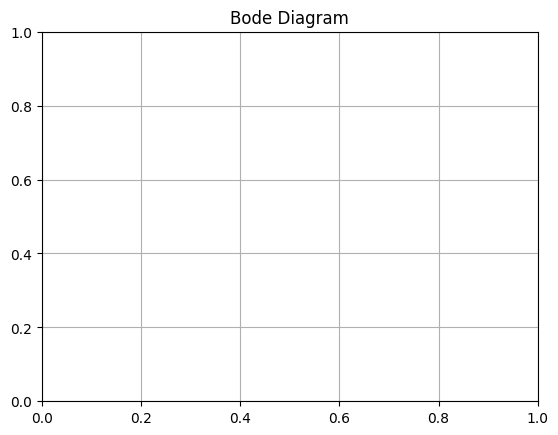

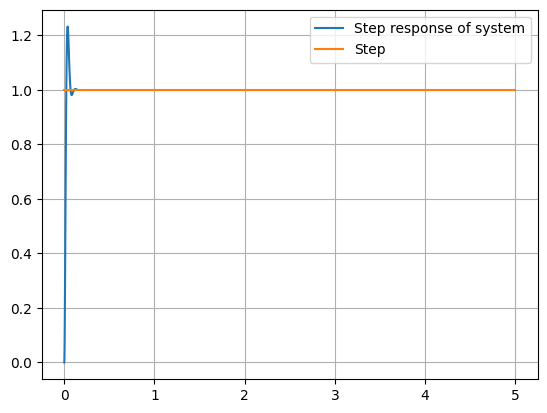

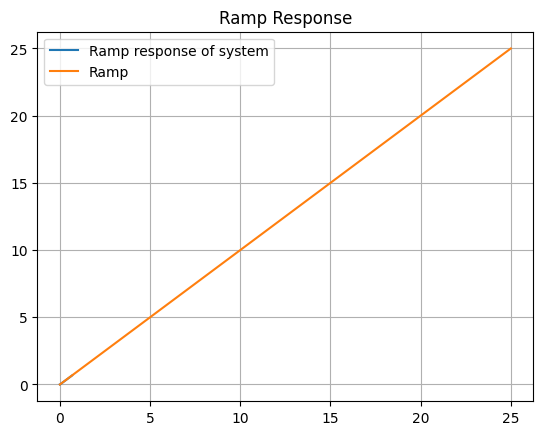

In [8]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

numerator_G = [3750]
denominator_G = [1, 25, 0]
G = ctrl.TransferFunction(numerator_G, denominator_G)

numerator_C = [0.021, 1]
denominator_C = [0.007, 1]
C = ctrl.TransferFunction(numerator_C, denominator_C)

G1 = ctrl.minreal(ctrl.series(C, G), verbose=False)

plt.figure(1)
ctrl.margin(G1)
plt.title("Bode Diagram")
plt.grid()

closed_loop = ctrl.feedback(G1, 1)
plt.figure(2)
time, response = ctrl.step_response(closed_loop)
time_unit, unit_response = ctrl.step_response(ctrl.TransferFunction(1, 1))
plt.plot(time, response, label='Step response of system')
plt.plot(time_unit, unit_response, label='Step')
plt.legend()
plt.grid()

plt.figure(3)
time, ramp_response = ctrl.step_response(ctrl.minreal(ctrl.TransferFunction(1, [1, 0]) * G1 / (1 + G1), verbose=False))
time_ramp, ramp = ctrl.step_response(ctrl.TransferFunction(1, [1, 0]))
plt.plot(time, ramp_response, label='Ramp response of system')
plt.plot(time_ramp, ramp, label='Ramp')
plt.title("Ramp Response")
plt.legend()
plt.grid()

plt.show()



